### Модели машинного обучения для предсказания погоды в городе Садо

In [1]:
import os
import urllib.request # библиотеки для скачинвания файлов

Подключаемся к нужному архиву , сайт с данными RP5.ru

In [2]:
url = 'http://93.90.217.253/download/files.metar/RJ/RJSN.01.01.2015.01.01.2022.1.0.0.ru.utf8.00000000.csv.gz'
filename = 'weather_sado.csv.gz'
urllib.request.urlretrieve(url, filename)

('weather_sado.csv.gz', <http.client.HTTPMessage at 0x2c3673a7b80>)

In [3]:
import pandas as pd # библиотеки для работы с данными
import numpy as np

In [4]:
df = pd.read_csv('weather_sado.csv', skiprows=6, encoding='utf-8', sep=';', index_col = False, on_bad_lines='skip')

In [5]:
df.head()

,Местное время в Ниигате (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13
0,01.01.2022 21:06,2.0,769.4,769.6,81.0,"Ветер, дующий с запада",11,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 240 м, рассеянная (40-...",7.0,-1.0,NaN
1,01.01.2022 21:00,3.0,768.7,768.9,60.0,"Ветер, дующий с западо-юго-запада",5,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 300 м, рассеянная (40-...",10.0 и более,-4.0,NaN
2,01.01.2022 20:37,2.0,769.4,769.6,70.0,"Ветер, дующий с запада",7,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 240 м, рассеянная (40-...",5.0,-3.0,NaN
3,01.01.2022 20:31,2.0,769.4,769.6,75.0,"Ветер, дующий с запада",6,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 150 м, рассеянная (40-...",3.5,-2.0,NaN
4,01.01.2022 20:30,2.0,769.4,769.6,75.0,"Ветер, дующий с запада",11,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 150 м, рассеянная (40-...",2.5,-2.0,NaN


In [6]:
df['date'] = pd.to_datetime(df['Местное время в Ниигате (аэропорт)'], dayfirst = True) # создадим новый столбец с правильным форматом даты

In [7]:
df.head()

,Местное время в Ниигате (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13,date
0,01.01.2022 21:06,2.0,769.4,769.6,81.0,"Ветер, дующий с запада",11,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 240 м, рассеянная (40-...",7.0,-1.0,NaN,2022-01-01 21:06:00
1,01.01.2022 21:00,3.0,768.7,768.9,60.0,"Ветер, дующий с западо-юго-запада",5,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 300 м, рассеянная (40-...",10.0 и более,-4.0,NaN,2022-01-01 21:00:00
2,01.01.2022 20:37,2.0,769.4,769.6,70.0,"Ветер, дующий с запада",7,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 240 м, рассеянная (40-...",5.0,-3.0,NaN,2022-01-01 20:37:00
3,01.01.2022 20:31,2.0,769.4,769.6,75.0,"Ветер, дующий с запада",6,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 150 м, рассеянная (40-...",3.5,-2.0,NaN,2022-01-01 20:31:00
4,01.01.2022 20:30,2.0,769.4,769.6,75.0,"Ветер, дующий с запада",11,NaN,"Слабый(ая)(ые) ливень (ливни), снег",NaN,"Незначительная (10-30%) 150 м, рассеянная (40-...",2.5,-2.0,NaN,2022-01-01 20:30:00


In [9]:
import matplotlib.pyplot as plt # библиотека для построения графиков

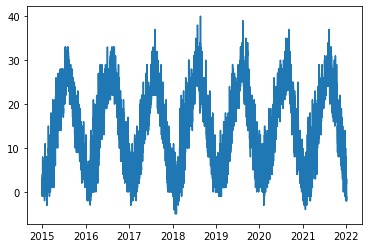

In [10]:
x = df['date'] # обозначим оси
y = df['T']
plt.plot(x, y)

In [11]:
df = df[df['T'].notna()] # почистим от пустых строк

In [12]:
df['T'].max(), df['T'].min(), df['T'].mean() # максимальная, минимальная, и средння температура за год

(40.0, -5.0, 13.263597175089425)

<AxesSubplot:>

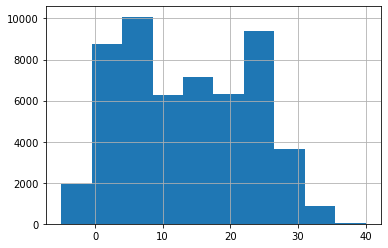

In [13]:
df['T'].hist()

In [17]:
df_cuted = df[df['date'] < '2018-01-01'] # создадим обрезанный датафрейм по дате

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

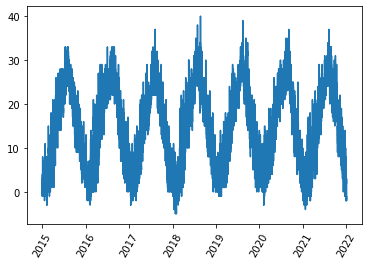

In [16]:
plt.plot(df['date'], df['T'])
plt.xticks(rotation = 60)

In [15]:
df_2017 = df[((df['date'] < '2018-01-01') & (df['date'] > '2016-12-31'))] # датафрейм по 2017 году

In [18]:
df_2017.head()

,Местное время в Ниигате (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13,date
31647,31.12.2017 21:27,5.0,759.5,759.7,93.0,"Ветер, дующий с запада",5,NaN,"Ливень (ливни), дождь",NaN,"Рассеянная (40-50%) 600 м, разорванная (60-90%...",4.5,4.0,NaN,2017-12-31 21:27:00
31648,31.12.2017 21:22,5.0,759.5,759.7,93.0,"Ветер, дующий с юго-юго-запада",4,NaN,"Ливень (ливни), дождь",NaN,"Рассеянная (40-50%) 600 м, разорванная (60-90%...",4.5,4.0,NaN,2017-12-31 21:22:00
31649,31.12.2017 21:00,5.0,758.8,759.0,87.0,"Ветер, дующий с юго-юго-востока",7,NaN,"Слабый(ая)(ые) ливень (ливни), дождь",NaN,"Незначительная (10-30%) 600 м, рассеянная (40-...",10.0 и более,3.0,NaN,2017-12-31 21:00:00
31650,31.12.2017 20:00,5.0,759.5,759.7,81.0,"Ветер, дующий с юго-юго-востока",6,NaN,"Слабый(ая)(ые) ливень (ливни), дождь",NaN,"Незначительная (10-30%) 600 м, разорванная (60...",10.0 и более,2.0,NaN,2017-12-31 20:00:00
31651,31.12.2017 19:00,5.0,758.8,759.0,76.0,"Ветер, дующий с юго-юго-востока",6,NaN,Слабый(ая)(ые) дождь,NaN,"Незначительная (10-30%) 900 м, разорванная (60...",10.0 и более,1.0,NaN,2017-12-31 19:00:00


In [19]:
df['T'].quantile(0.95), df['T'].quantile(0.05)

(28.0, 0.0)

### Подготоим столбец с номером дня для линейной регрессии

In [22]:
df['dayofyear'] = df['date'].dt.dayofyear

In [23]:
df['cos_dayofyear'] = np.cos((df['dayofyear'] - 1) / 366 * 2 * np.pi)

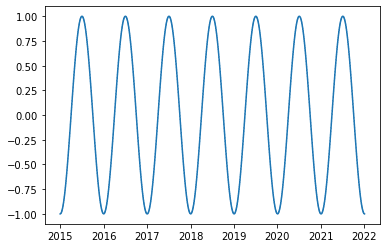

In [24]:
plt.plot(df['date'], -df['cos_dayofyear'])

In [25]:
df_train = df[df['date'] < '2020-01-01'] # подготовим тестовый и тренировочный датафрейм
df_test = df[df['date'] >= '2020-01-01']

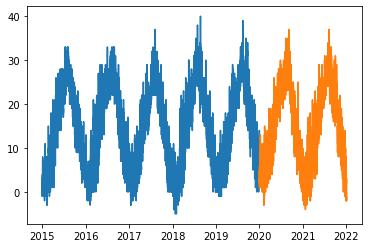

In [27]:
plt.plot(df_train['date'], df_train['T'])
plt.plot(df_test['date'], df_test['T']) # желтым цветом отмеченна часть тестового датафрейма

In [28]:
x_train = pd.DataFrame() # подготовим данные для обучения
x_train['cos_dayofyear'] = df_train['cos_dayofyear']

x_test = pd.DataFrame()
x_test['cos_dayofyear'] = df_test['cos_dayofyear']

y_train = df_train['T']
y_test = df_test['T']

Модель линейной регрессии 1

In [29]:
from sklearn.linear_model import LinearRegression # возьмем из библиотеки модель с линйеной регрессией

In [30]:
model = LinearRegression()

In [31]:
model.fit(x_train, y_train) # обучение

LinearRegression()

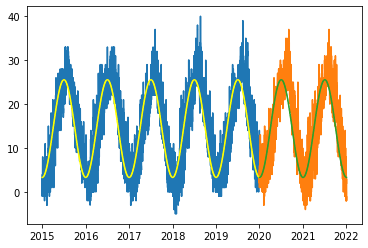

In [32]:
prediction_train = model.predict(x_train) # посмотрим на графики реальных данных и модели
prediction_test = model.predict(x_test)
plt.plot(df_train['date'], y_train)
plt.plot(df_test['date'], y_test)
plt.plot(df_train['date'], prediction_train, color = 'yellow')
plt.plot(df_test['date'], prediction_test)

In [33]:
from sklearn.metrics import mean_absolute_error # взглянем на ошибки по выборкам
print('Средняя ошибка на тренировочной выборке =', mean_absolute_error(y_train, prediction_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, prediction_test))

Средняя ошибка на тренировочной выборке = 4.09948701750563
Средняя ошибка на тестовой выборке = 4.197682329395318


In [34]:
model.coef_, model.intercept_ # коэфициенты для синусоидного графкика подобранные моделью

(array([-11.12450691]), 14.423100019028508)

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


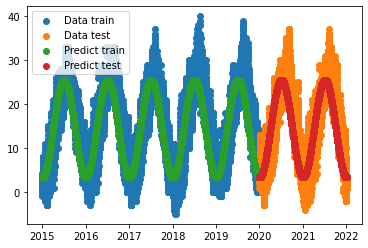

In [35]:

plt.scatter(df_train['date'], y_train, label ='Data train') # точечный график
plt.scatter(df_test['date'], y_test, label ='Data test')
plt.scatter(df_train['date'], prediction_train, label ='Predict train')
plt.scatter(df_test['date'], prediction_test, label ='Predict test')
plt.legend()

Модель дерева 1

In [37]:
from sklearn.tree import DecisionTreeRegressor # модель дерево решений

Средняя ошибка на тренировочной выборке = 2.1954248975779076
Средняя ошибка на тестовой выборке = 2.886327855184007


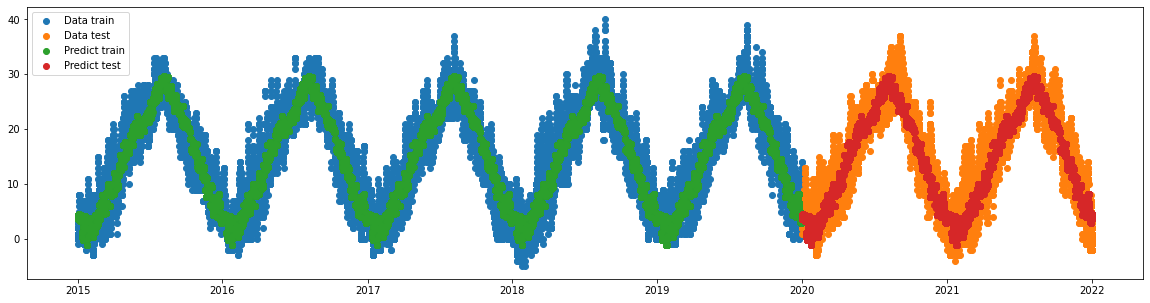

In [38]:
x_train = pd.DataFrame()
x_train['dayofyear'] = df_train['dayofyear']

x_test = pd.DataFrame()
x_test['dayofyear'] = df_test['dayofyear']
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
print('Средняя ошибка на тренировочной выборке =', mean_absolute_error(y_train, prediction_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, prediction_test))
plt.figure(figsize=(20, 5))
plt.scatter(df_train['date'], y_train, label ='Data train')
plt.scatter(df_test['date'], y_test, label ='Data test')
plt.scatter(df_train['date'], prediction_train, label ='Predict train')
plt.scatter(df_test['date'], prediction_test, label ='Predict test')
plt.legend()

Модель дерева 2

Средняя ошибка на тренировочной выборке = 2.283878586622128
Средняя ошибка на тестовой выборке = 2.799002163007743


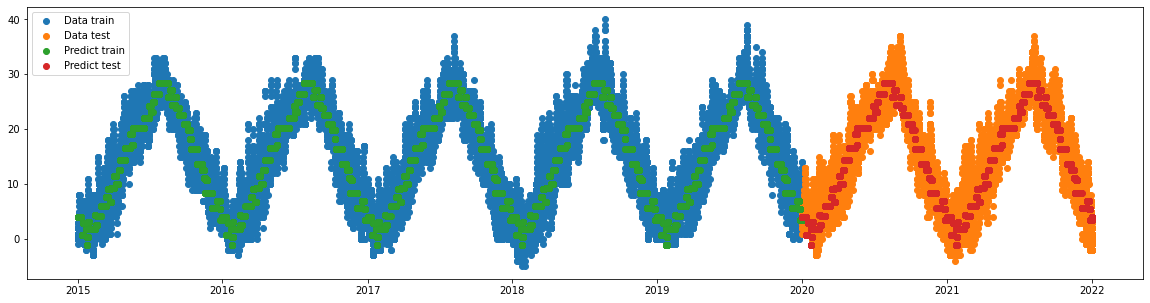

In [48]:
x_train = pd.DataFrame()
x_train['dayofyear'] = df_train['dayofyear']

x_test = pd.DataFrame()
x_test['dayofyear'] = df_test['dayofyear']
model = DecisionTreeRegressor(max_leaf_nodes=50) # ограничим количество листьев, чтобы уменьшить переобуение
model.fit(x_train, y_train)
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
print('Средняя ошибка на тренировочной выборке =', mean_absolute_error(y_train, prediction_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, prediction_test))
plt.figure(figsize=(20, 5))
plt.scatter(df_train['date'], y_train, label ='Data train')
plt.scatter(df_test['date'], y_test, label ='Data test')
plt.scatter(df_train['date'], prediction_train, label ='Predict train')
plt.scatter(df_test['date'], prediction_test, label ='Predict test')
plt.legend()

Прогноз температуры в будущем

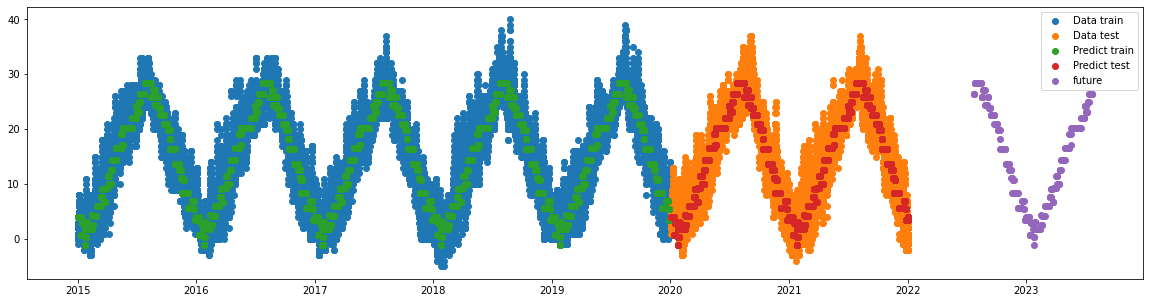

In [49]:
data_future = pd.DataFrame()
data_future['date'] = pd.date_range('2022-07-23', '2023-07-23')
data_future['dayofyear'] = data_future['date'].dt.dayofyear
x_future = pd.DataFrame()
x_future['dayofyear'] = data_future['dayofyear']

prediction = model.predict(x_future)


plt.figure(figsize=(20, 5))
plt.scatter(df_train['date'], y_train, label ='Data train')
plt.scatter(df_test['date'], y_test, label ='Data test')
plt.scatter(df_train['date'], prediction_train, label ='Predict train')
plt.scatter(df_test['date'], prediction_test, label ='Predict test')
plt.scatter(data_future['date'], prediction, label = 'future')
plt.legend()

In [50]:
data_future['T'] = prediction

In [53]:
prediction[:10]

array([26.32440945, 26.32440945, 26.32440945, 28.48388889, 28.48388889,
       28.48388889, 28.48388889, 28.48388889, 28.48388889, 28.48388889])

In [54]:
data_future.loc[data_future['date'] == '2022-12-23'] # посмотрим на прогнозируемую погоду в декабре 2023 года

,date,dayofyear,T
153,2022-12-23,357,6.977204
